# Step Attenuator
## Example E11 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example has multiple input variables with different distributions, including normal, uniform, t, and arcsine.

The $L_s$ variable is a series of 4 measurements; Type A uncertainty will be calculated from the 4 values supplied to `measure()`. The other variables contain only Type B uncertainties.

In [1]:
import suncal

import matplotlib.pyplot as plt

In [2]:
model = suncal.Model('Lx = Ls + dLs + dLd + dLm + dLk + dLib - dLia + dL0b - dL0a')
model.var('Ls').measure([30.033, 30.058, 30.018, 30.052])
model.var('dLs').measure(0.003).typeb(dist='uniform', a=0.00433)
model.var('dLd').measure(0.0).typeb(dist='arcsine', a=0.001980)
model.var('dLm').measure(0.0).typeb(dist='arcsine', a=0.02828)
model.var('dLk').measure(0.0).typeb(dist='arcsine', a=0.003)
model.var('dLib').measure(0.0).typeb(dist='uniform', a=0.0005196)
model.var('dLia').measure(0.0).typeb(dist='uniform', a=0.0005196)
model.var('dL0b').measure(0.0).typeb(dist='normal', std=0.002)
model.var('dL0a').measure(0.0).typeb(dist='normal', std=0.002)
result = model.calculate()
result

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$Lx$   | GUM          | 30.043  | 0.022           | ± 0.044     | 1.982     | 109.6         |
|$Lx$   | Monte Carlo  | 30.043  | 0.022           | (30.004, 30.083) | 1.752     | &nbsp;        |

In [3]:
# Compare to Exhibit 16 to verify distribution parameters were converted to normal/standard uncertainty
result.report.variables.summary()

Variable,Mean,Std. Uncertainty,Deg. Freedom,Description
$Ls$,30.0402,0.0091,3.0,
$dL0a$,0.0,0.0020,inf,
$dL0b$,0.0,0.0020,inf,
$dLd$,0.0,0.0014,inf,
$dLia$,0.0,0.00030,inf,
$dLib$,0.0,0.00030,inf,
$dLk$,0.0,0.0021,inf,
$dLm$,0.0,0.020,inf,
$dLs$,0.0030,0.0025,inf,


In [4]:
result.report.expanded(.95)

In [5]:
result.report.expanded(.68)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


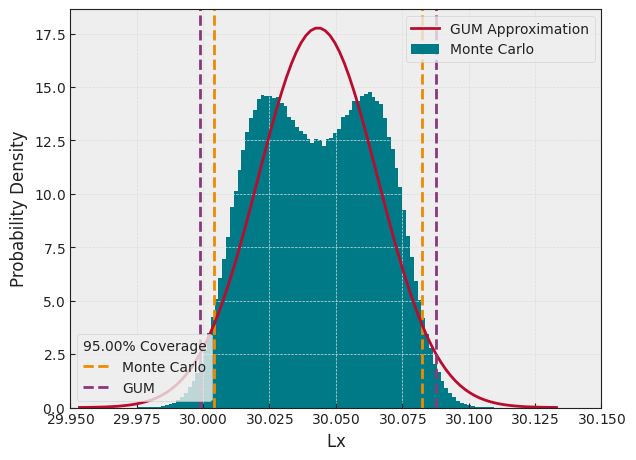

In [6]:
# Compare to Exhibit 17
result.report.plot.pdf(interval=.95);
plt.xlim(29.95, 30.15);